In [7]:
# Cell 1: Re-download and save properly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Download fresh
data = yf.download('RELIANCE.NS', start='2019-02-01', end='2024-02-01')

# Check it
print(data.columns.tolist())
print(data.head())

[*********************100%***********************]  1 of 1 completed

[('Close', 'RELIANCE.NS'), ('High', 'RELIANCE.NS'), ('Low', 'RELIANCE.NS'), ('Open', 'RELIANCE.NS'), ('Volume', 'RELIANCE.NS')]
Price            Close        High         Low        Open      Volume
Ticker     RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS RELIANCE.NS
Date                                                                  
2019-02-01  555.832520  558.078198  545.649313  548.739866    20187323
2019-02-04  574.042480  576.732830  552.319667  554.520820    25528059
2019-02-05  574.331421  580.045653  568.572781  574.531553    20479210
2019-02-06  582.646973  585.937658  575.532056  576.421398    20586783
2019-02-07  573.820068  587.516297  571.907923  582.646999    20150710


In [8]:
# Cell 2: Save cleanly this time
data.to_csv('../data/stock_data_clean.csv')
print("Saved cleanly!")
print(f"Shape: {data.shape}")

Saved cleanly!
Shape: (1233, 5)


In [9]:
# Cell 3: Load clean data
data = pd.read_csv('../data/stock_data_clean.csv', index_col='Date', parse_dates=True)
print("Loaded successfully!")
print(data.head())

ValueError: 'Date' is not in list

In [10]:
# Reload data properly
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download fresh
data = yf.download('RELIANCE.NS', start='2019-02-01', end='2024-02-01')

# Flatten multi-level columns (new yfinance issue)
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

# Verify
print(data.columns.tolist())
print(data.shape)
print(data.head())

[*********************100%***********************]  1 of 1 completed

['Close', 'High', 'Low', 'Open', 'Volume']
(1233, 5)
Price            Close        High         Low        Open    Volume
Date                                                                
2019-02-01  555.832520  558.078198  545.649313  548.739866  20187323
2019-02-04  574.042480  576.732830  552.319667  554.520820  25528059
2019-02-05  574.331421  580.045653  568.572781  574.531553  20479210
2019-02-06  582.646973  585.937658  575.532056  576.421398  20586783
2019-02-07  573.820068  587.516297  571.907923  582.646999  20150710


In [14]:
data['MA_10'] = data['Close'].rolling(10).mean() 
data['MA_20'] = data['Close'].rolling(20).mean()
data['MA_50'] = data['Close'].rolling(50).mean()
print(data[['Close', 'MA_10', 'MA_20', 'MA_50']].head(60))

Price            Close       MA_10       MA_20       MA_50
Date                                                      
2019-02-01  555.832520         NaN         NaN         NaN
2019-02-04  574.042480         NaN         NaN         NaN
2019-02-05  574.331421         NaN         NaN         NaN
2019-02-06  582.646973         NaN         NaN         NaN
2019-02-07  573.820068         NaN         NaN         NaN
2019-02-08  568.172607         NaN         NaN         NaN
2019-02-11  557.299988         NaN         NaN         NaN
2019-02-12  558.700867         NaN         NaN         NaN
2019-02-14  544.381958         NaN         NaN         NaN
2019-02-15  553.386719  564.261560         NaN         NaN
2019-02-18  542.558899  562.934198         NaN         NaN
2019-02-19  540.780151  559.607965         NaN         NaN
2019-02-20  548.895508  557.064374         NaN         NaN
2019-02-21  554.476257  554.247302         NaN         NaN
2019-02-22  548.006287  551.665924         NaN         N

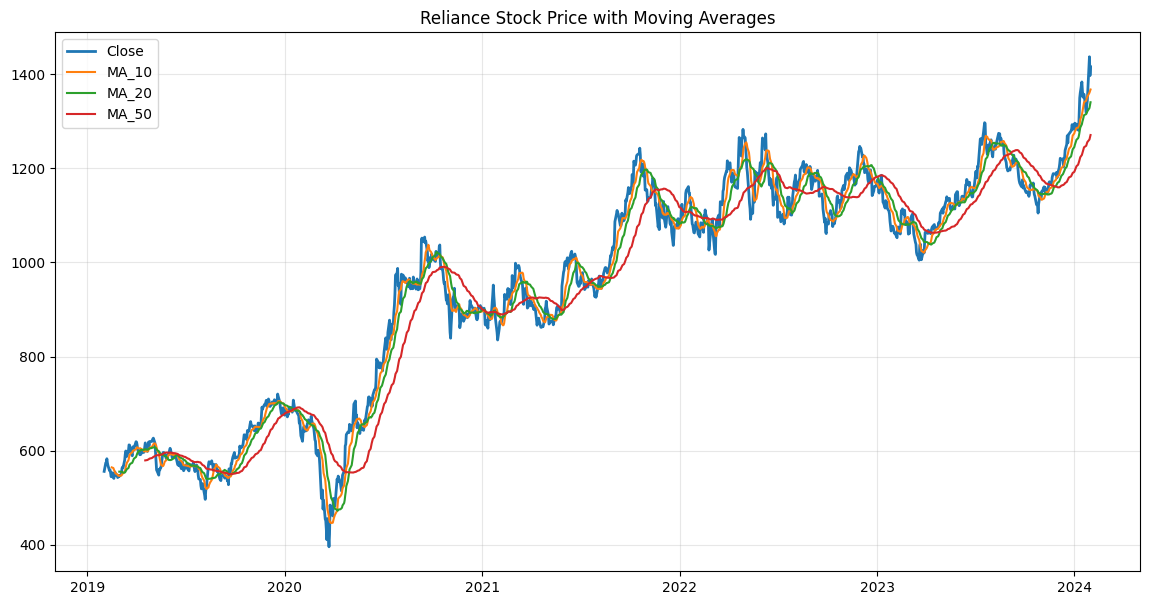

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close', linewidth=2)
plt.plot(data.index, data['MA_10'], label='MA_10')
plt.plot(data.index, data['MA_20'], label='MA_20')
plt.plot(data.index, data['MA_50'], label='MA_50')
plt.legend()
plt.title('Reliance Stock Price with Moving Averages')
plt.grid(True, alpha=0.3)
plt.show()

In [16]:
# Create simple test data
test = pd.Series([100, 105, 102, 108, 103])

print("Original prices:")
print(test.values)

print("\nAfter .diff():")
print(test.diff().values)

Original prices:
[100 105 102 108 103]

After .diff():
[nan  5. -3.  6. -5.]


In [17]:
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data['Close'])
print(data['RSI'].tail(10))

Date
2024-01-16    70.672105
2024-01-17    64.692673
2024-01-18    69.236638
2024-01-19    68.638031
2024-01-23    55.114201
2024-01-24    61.695224
2024-01-25    62.123570
2024-01-29    72.870749
2024-01-30    66.490564
2024-01-31    68.884583
Name: RSI, dtype: float64


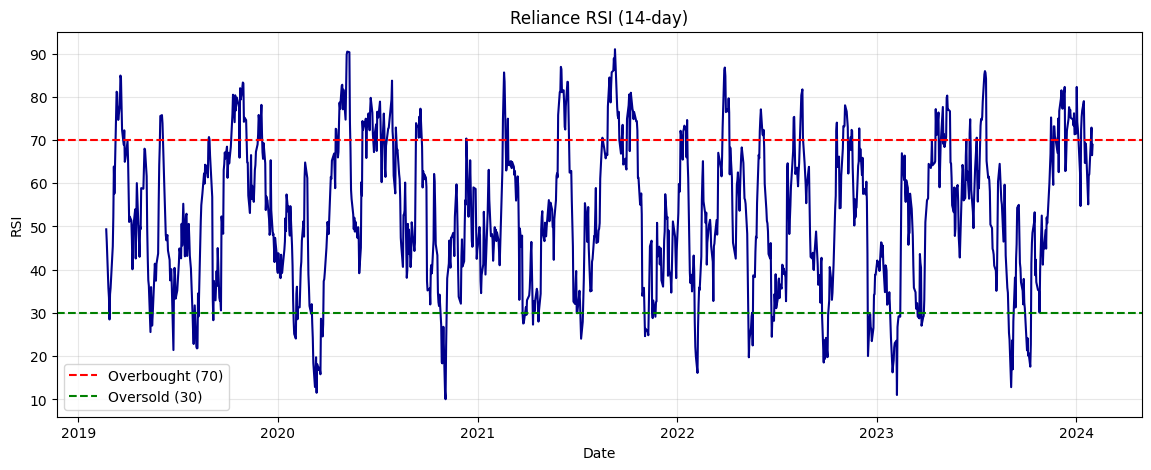

In [23]:
plt.figure(figsize=(14, 5))
plt.plot(data.index, data['RSI'], color='darkblue')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Reliance RSI (14-day)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [24]:
# Count overbought periods
overbought = data[data['RSI'] > 70]
oversold = data[data['RSI'] < 30]

print(f"Times RSI above 70 (overbought): {len(overbought)} days")
print(f"Times RSI below 30 (oversold): {len(oversold)} days")

Times RSI above 70 (overbought): 243 days
Times RSI below 30 (oversold): 118 days


In [25]:
start_price = data['Close'].iloc[0]
end_price = data['Close'].iloc[-1]
returns = ((end_price - start_price) / start_price) * 100

print(f"Price in Feb 2019: ₹{start_price:.2f}")
print(f"Price in Feb 2024: ₹{end_price:.2f}")
print(f"Total return: {returns:.2f}%")

Price in Feb 2019: ₹555.83
Price in Feb 2024: ₹1416.14
Total return: 154.78%
